In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical Columns

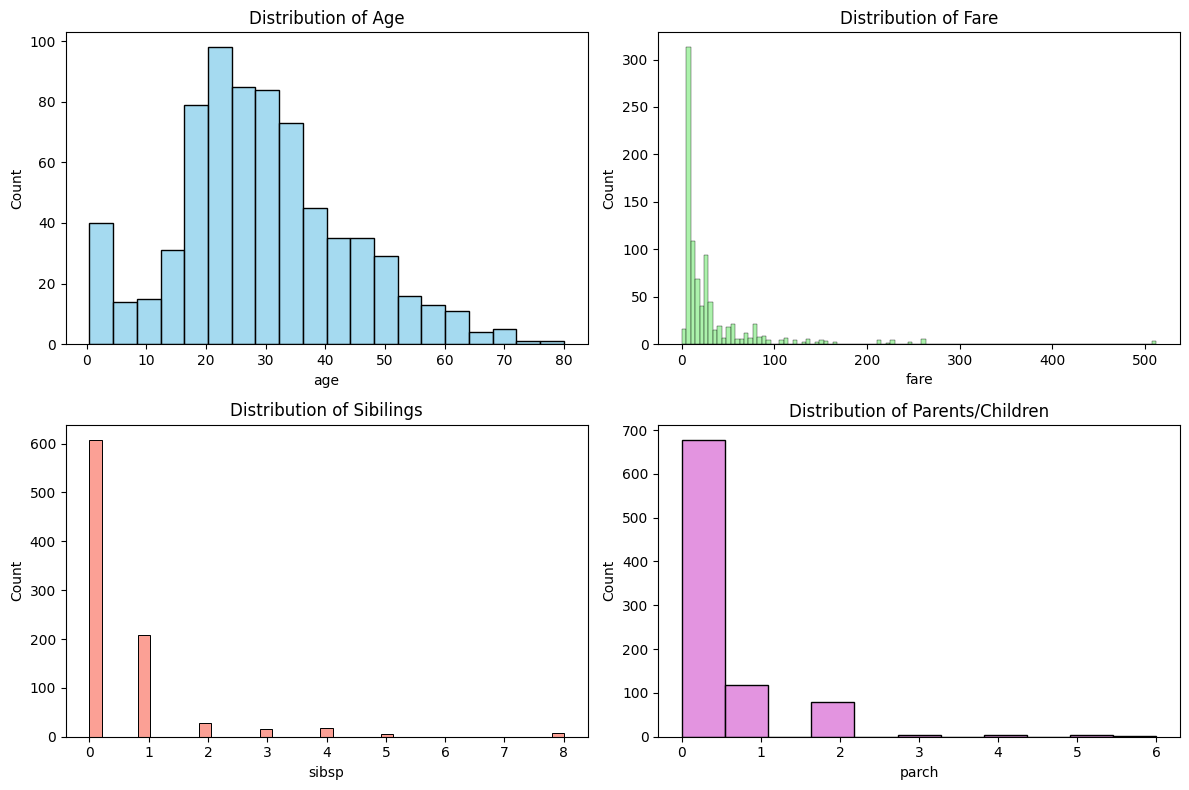

In [ ]:
num_cols=['age','fare','sibps','parch']

fig, axes = plt.subplots(2, 2,  figsize=(12, 8))


# Plot each histogram manually
sns.histplot(titanic['age'].dropna(), ax=axes[0, 0], color='skyblue', )
axes[0, 0].set_title('Distribution of Age')

sns.histplot(titanic['fare'].dropna(), ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Distribution of Fare')

sns.histplot(titanic['sibsp'], ax=axes[1, 0],  color='salmon')
axes[1, 0].set_title('Distribution of Sibilings')

sns.histplot(titanic['parch'], ax=axes[1, 1], color='orchid')
axes[1, 1].set_title('Distribution of Parents/Children')

# Adjust layout
plt.tight_layout()
plt.show()

Histogram

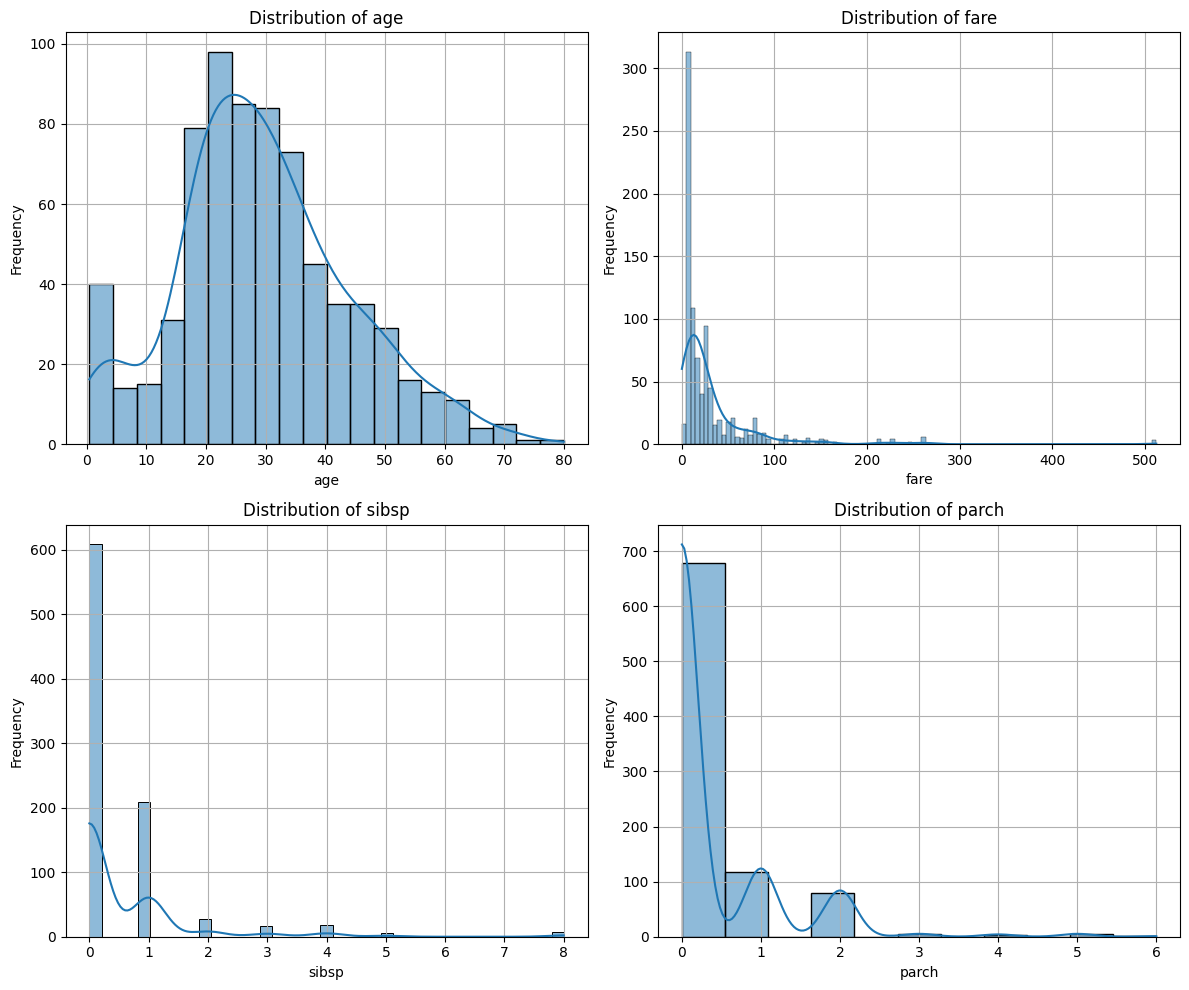

In [ ]:
num_cols=['age','fare','sibsp','parch']

fig, axes = plt.subplots(2, 2,  figsize=(12, 10))
axes = axes.flatten()
for i, col in enumerate(num_cols):
  sns.histplot(titanic[col].dropna(),kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
  axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

BoxPlot

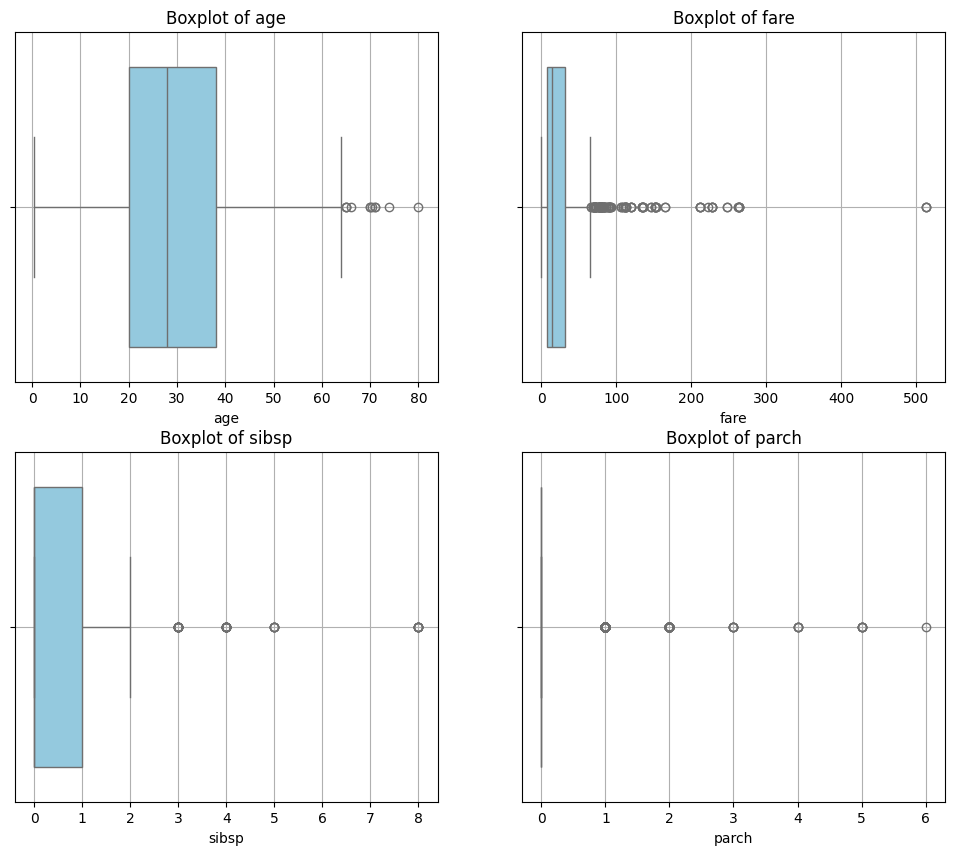

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['age', 'fare', 'sibsp', 'parch']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=titanic[col].dropna(), ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].grid(True)

plt.show()



Categorical Columns

CountPlot

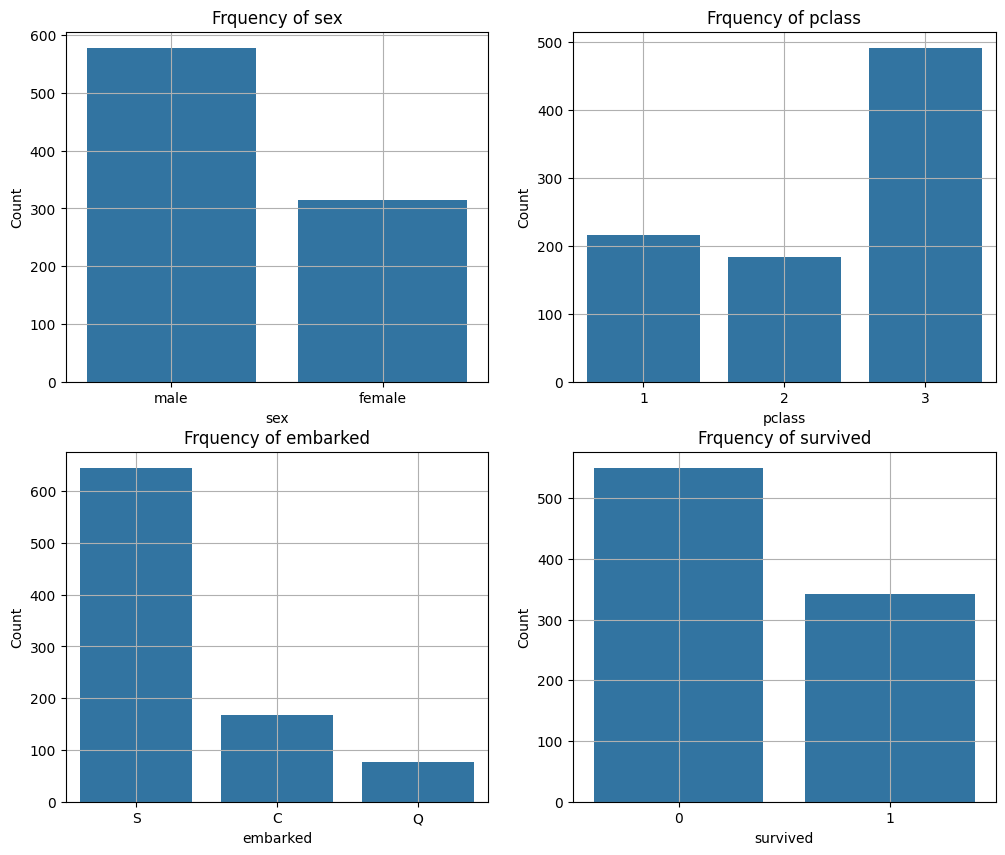

In [ ]:
cat_cols=['sex','pclass','embarked','survived']
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
  sns.countplot(x=titanic[col].dropna(), ax=axes[i])
  axes[i].set_title(f'Frquency of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')
  axes[i].grid(True)

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
titanic[num_cols].skew()

,0
age,0.389108
fare,4.787317
sibsp,3.695352
parch,2.749117


In [ ]:
titanic[num_cols].kurt()

,0
age,0.178274
fare,33.398141
sibsp,17.880420
parch,9.778125


PiePlot

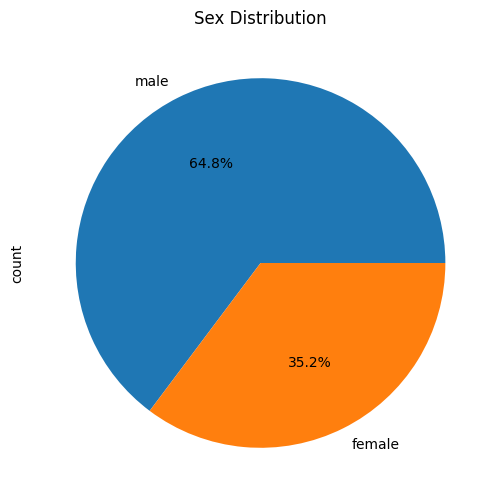

In [ ]:
titanic['sex'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))
plt.title('Sex Distribution')
plt.show()

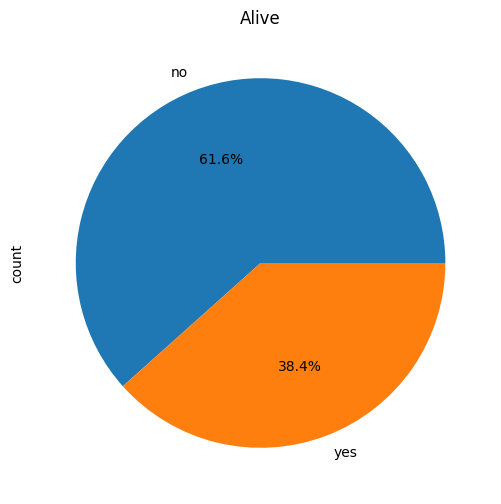

In [ ]:
titanic['alive'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))
plt.title('Alive')
plt.show()

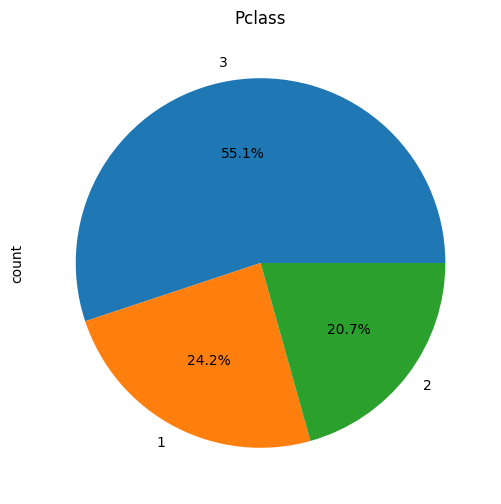

In [ ]:
titanic['pclass'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(6,6))
plt.title('Pclass')
plt.show()

ViolinPlot

<Axes: xlabel='alive', ylabel='fare'>

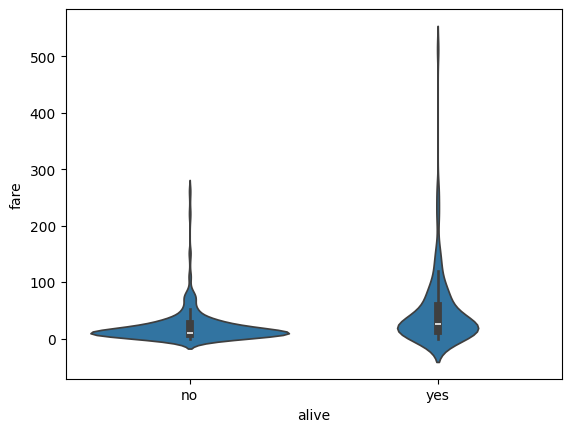

In [ ]:
sns.violinplot(x=titanic['alive'],y=titanic['fare'])

In [ ]:
#Categorical Summary Table

for col in titanic.select_dtypes('category').columns:
  print(f"\n {col} - Unique values: {titanic[col].nunique()}")
  print(titanic[col].value_counts)


 class - Unique values: 3
<bound method IndexOpsMixin.value_counts of 0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']>

 deck - Unique values: 7
<bound method IndexOpsMixin.value_counts of 0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']>


Bivariate

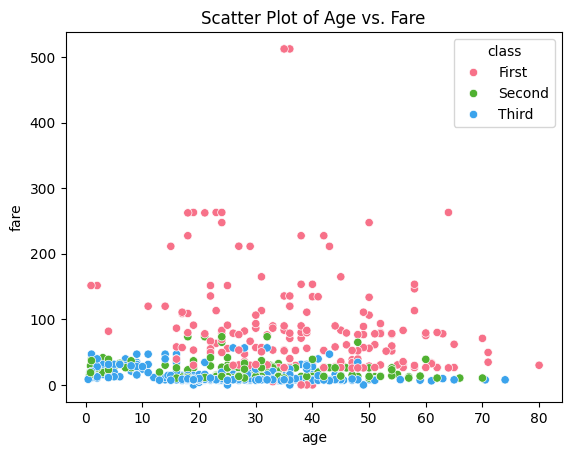

In [ ]:
sns.scatterplot(data=titanic, x="age", y="fare", hue="class", palette="husl")
plt.title("Scatter Plot of Age vs. Fare")
plt.show()

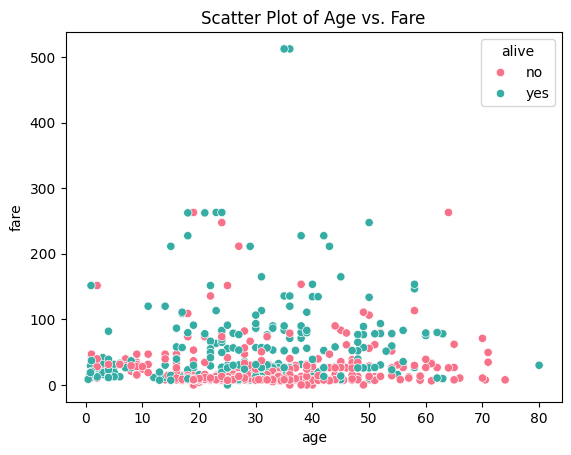

In [ ]:
sns.scatterplot(data=titanic, x="age", y="fare", hue="alive", palette="husl")
plt.title("Scatter Plot of Age vs. Fare")
plt.show()

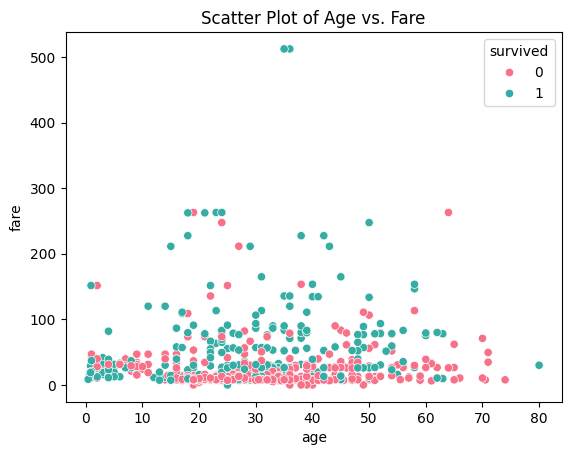

In [ ]:
sns.scatterplot(data=titanic, x="age", y="fare", hue="survived", palette="husl")
plt.title("Scatter Plot of Age vs. Fare")
plt.show()

JointPlot

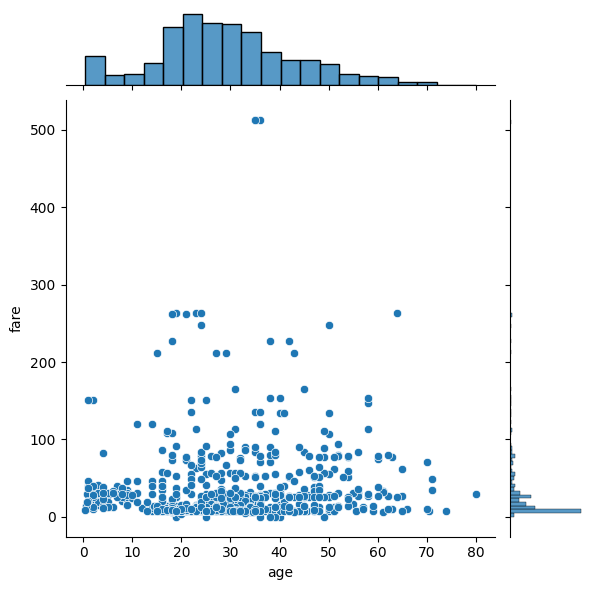

In [ ]:
#JointPlot (scatter + kde) age vs fare
sns.jointplot(data=titanic ,x='age', y='fare', kind='scatter')


<Axes: >

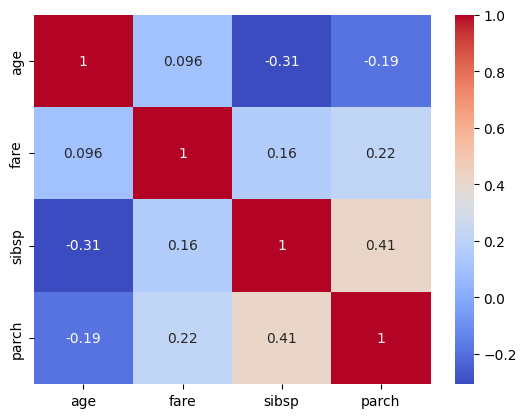

In [ ]:
sns.heatmap(titanic[['age','fare','sibsp','parch']].corr(),annot=True,cmap="coolwarm")

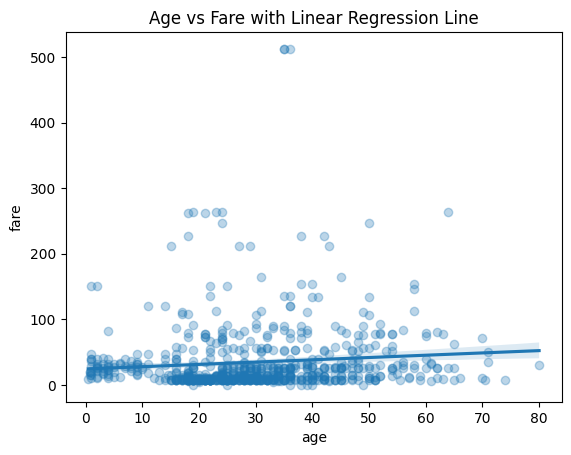

In [ ]:
#RegPlot Regression Loine
sns.regplot(data=titanic, x='age', y='fare',scatter_kws={'alpha':0.3})
plt.title("Age vs Fare with Linear Regression Line")
plt.show()

CAtegorical vs Numerical

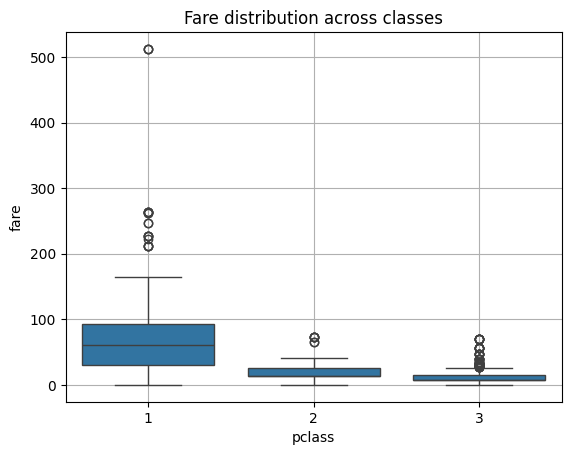

In [ ]:
#pclass vs fare, sex vs age, boxplot and violinplot

sns.boxplot(x='pclass', y='fare',data=titanic)
plt.title("Fare distribution across classes")
plt.grid(True)
plt.show()

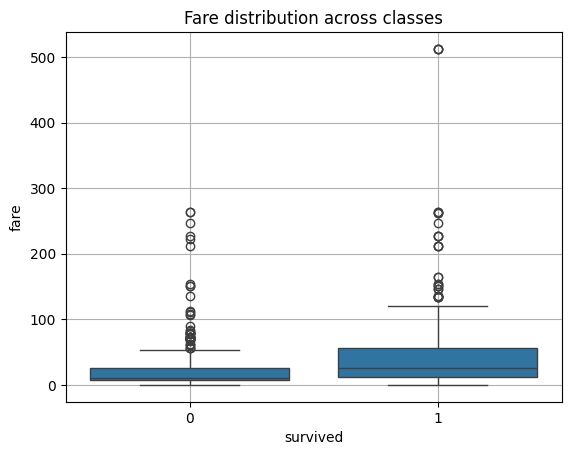

In [ ]:
sns.boxplot(x='survived', y='fare',data=titanic)
plt.title("Fare distribution across classes")
plt.grid(True)
plt.show()

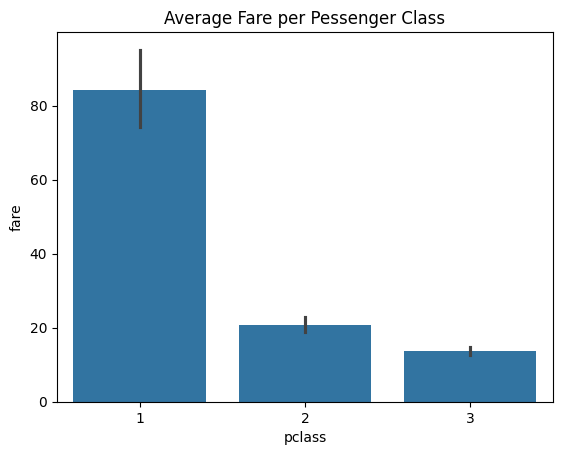

In [ ]:
sns.barplot (x='pclass', y='fare', data=titanic,estimator='mean')
plt.title("Average Fare per Pessenger Class")
plt.show()

SwarmPlot

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


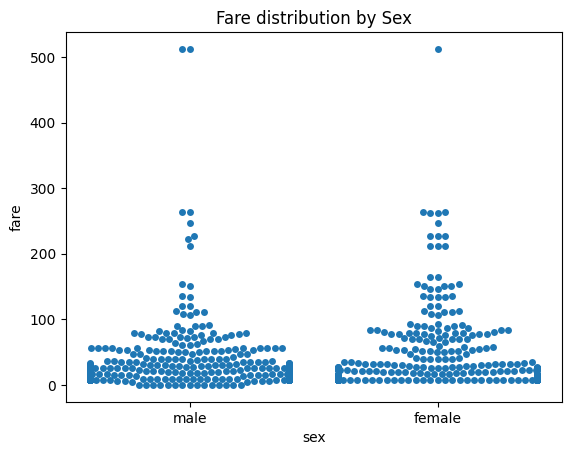

In [ ]:
sns.swarmplot(data=titanic, x='sex', y='fare')
plt.title("Fare distribution by Sex")
plt.show()

StripPlot

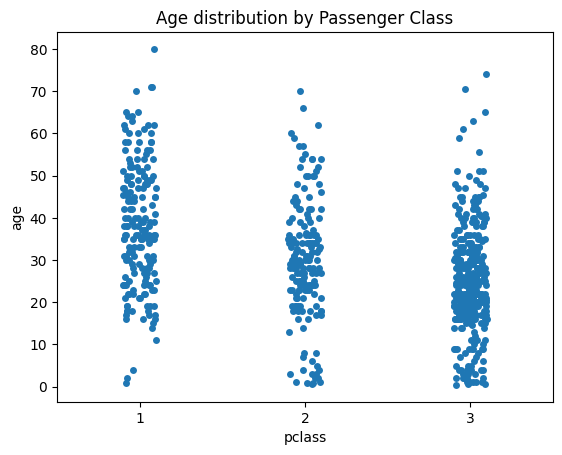

In [ ]:
sns.stripplot(data=titanic, x='pclass', y='age', jitter=True)
plt.title("Age distribution by Passenger Class")
plt.show()

Categorical vs Categorical

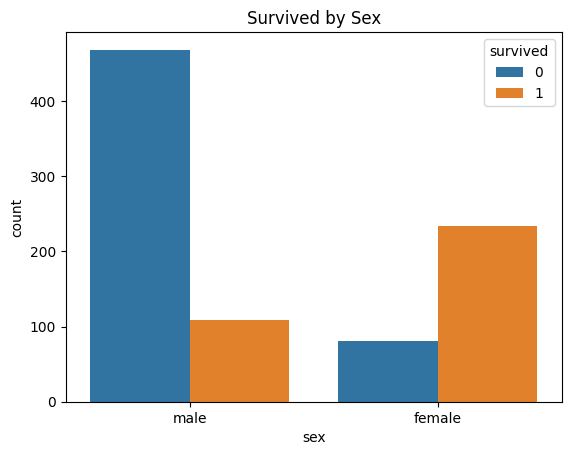

In [ ]:
sns.countplot(data=titanic,x='sex',hue='survived')
plt.title("Survived by Sex")
plt.show()

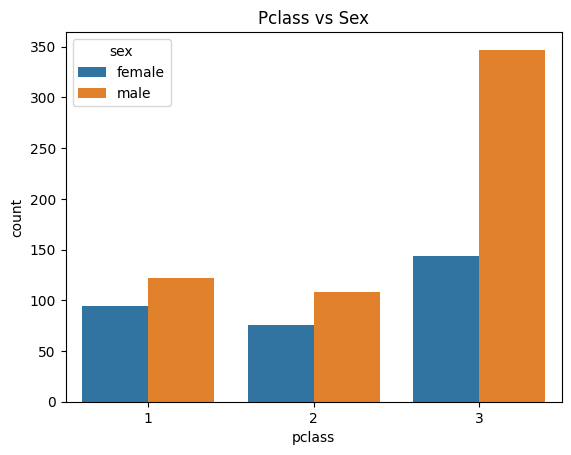

In [ ]:
sns.countplot(data=titanic,x='pclass',hue='sex')
plt.title("Pclass vs Sex")
plt.show()

In [ ]:
#crosstab

In [ ]:
pd.crosstab(titanic['sex'],titanic['survived'], margins=True )

survived,0,1,All
sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [ ]:
#Heatmap of CrossTab

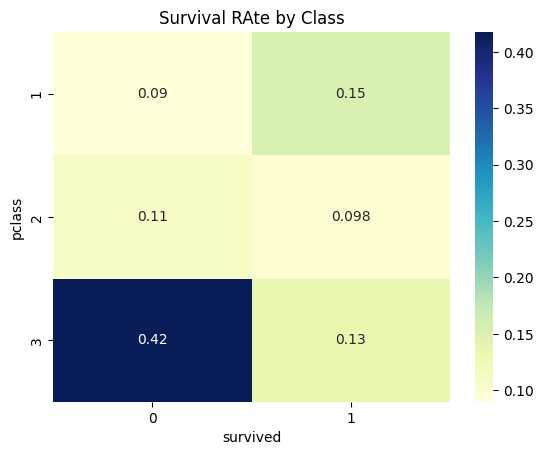

In [ ]:
ct=pd.crosstab(titanic['pclass'],titanic['survived'],normalize=True,)
sns.heatmap(ct,annot=True,cmap="YlGnBu")
plt.title("Survival RAte by Class")
plt.show()

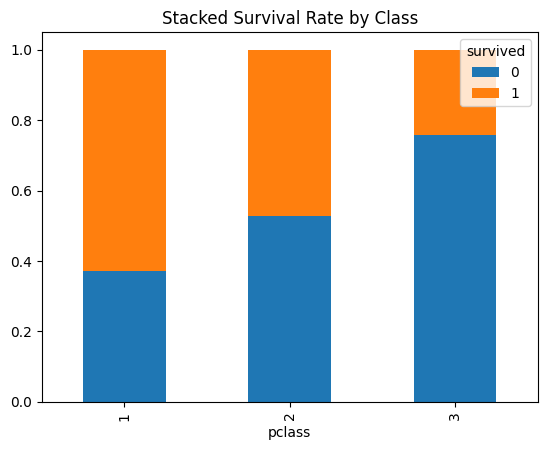

In [ ]:
ct=pd.crosstab(titanic['pclass'],titanic['survived'])
ct.div(ct.sum(1), axis=0).plot(kind='bar',stacked=True)
plt.title("Stacked Survival Rate by Class")
plt.show()

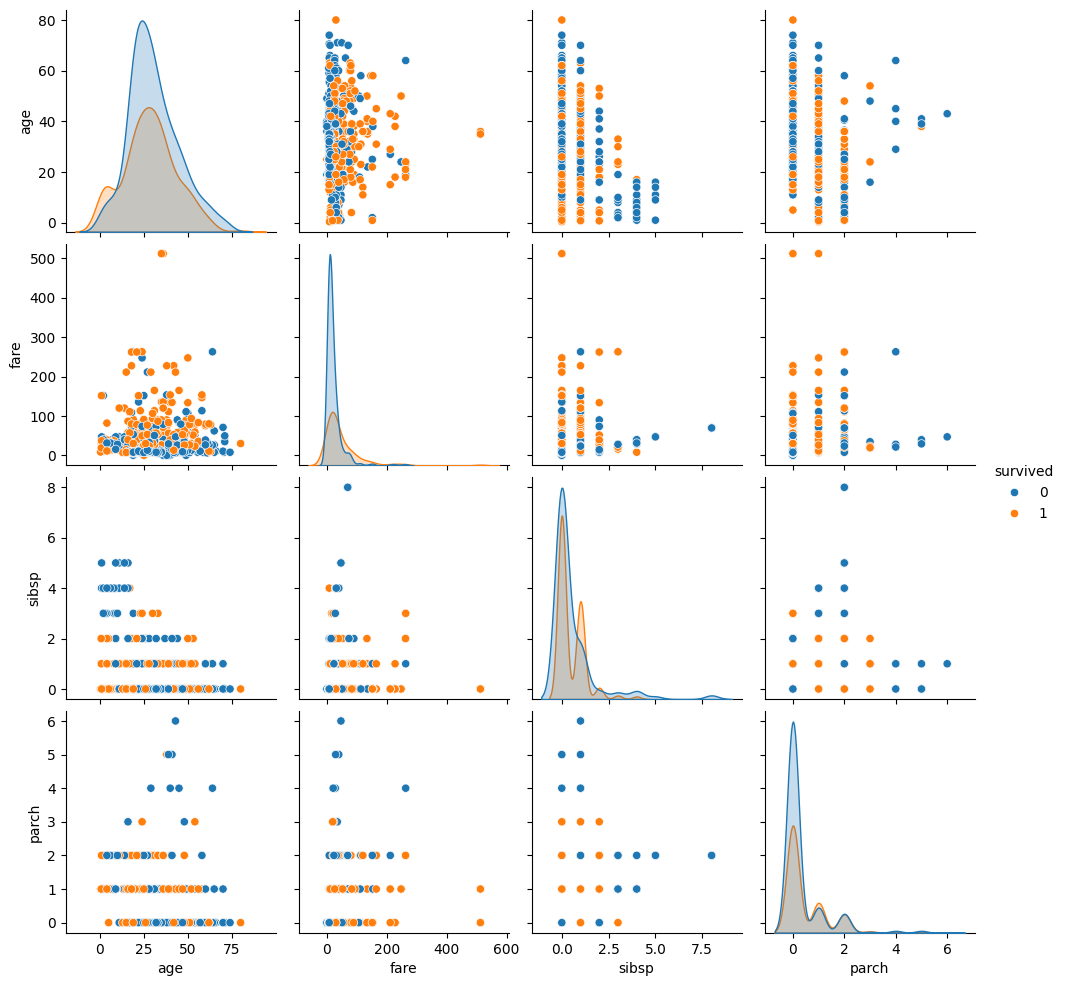

In [ ]:
#pairplot, Quick Bivariate Grid
sns.pairplot(titanic[['age','fare','sibsp','parch','survived']],hue='survived')


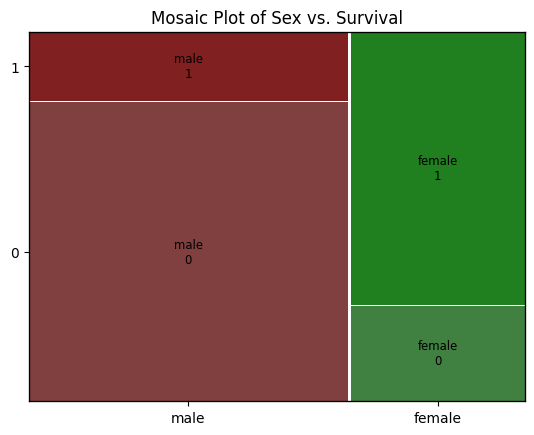

In [ ]:
#Mosaic

mosaic(titanic,['sex','survived'])
plt.title("Mosaic Plot of Sex vs. Survival")
plt.show()

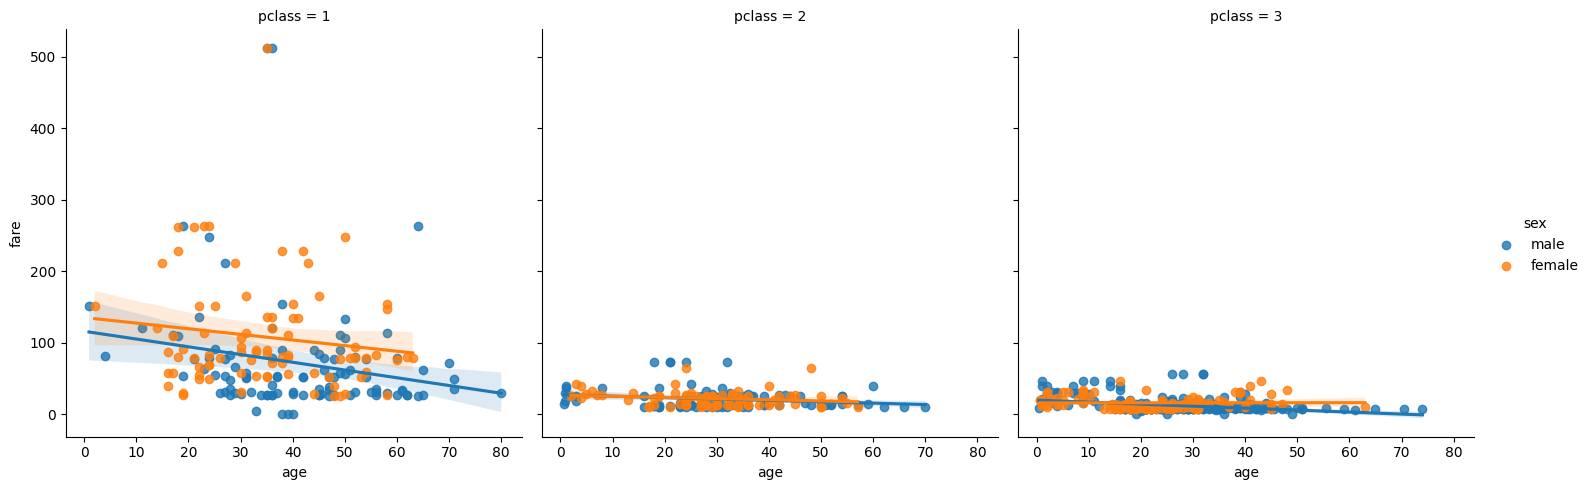

In [ ]:
sns.lmplot(data=titanic, x='age',y='fare', hue='sex',col='pclass')
